# Importing our Data


In [1]:
import numpy as np
import keras

(pics, labels), _ = keras.datasets.mnist.load_data()

print(pics.shape)

Using TensorFlow backend.


(60000, 28, 28)


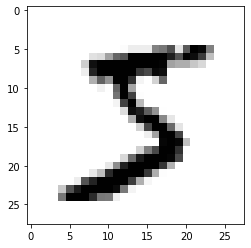

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(pics[0], cmap=plt.cm.binary)

In [3]:
pics = np.resize(pics, (60000, 784))
pics.shape

(60000, 784)

In [4]:
pics[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
pics = pics.astype('float32')
pics /= 255
pics.shape

(60000, 784)

In [6]:
pics[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Let's One_Hot_Encode the Labels #

In [7]:
labels[0]

5

In [8]:
from keras.utils import np_utils

labels = np_utils.to_categorical(labels, 10)
labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Now Let's Build our Model #

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
def TrainingLoop(number_of_epochs, verbose):
    model.fit(pics, labels, \
              batch_size=128, \
              epochs=number_of_epochs, \
              verbose=verbose, \
              validation_split=.1 )

TrainingLoop(2, 1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 3s 51us/step - loss: 0.2673 - acc: 0.9196 - val_loss: 0.0970 - val_acc: 0.9713
Epoch 2/2
54000/54000 [==============================] - 1s 19us/step - loss: 0.1071 - acc: 0.9673 - val_loss: 0.0716 - val_acc: 0.9795


In [11]:
test_image = pics[110]
test_image.shape

(784,)

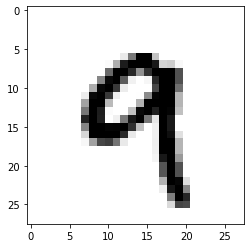

In [12]:
test_image_2d = np.resize(test_image, (28, 28) )
plt.imshow( test_image_2d, cmap=plt.cm.binary)

In [13]:
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch.shape

(1, 784)

In [14]:
result = model.predict( test_image_batch, batch_size=1, verbose=1)
result

1/1 [==============================] - 0s 27ms/step


array([[2.28969679e-06, 2.62629101e-07, 9.09657786e-07, 1.06889296e-04,
        1.67704187e-04, 3.41787791e-06, 5.10912841e-08, 2.77094834e-04,
        3.62844548e-05, 9.99405026e-01]], dtype=float32)

In [15]:
highest_index = np.argmax(result, axis=1)[0]
print(highest_index)

9
